## Online Credit Card Transactions Fraud Detection

### Understanding the dataset

In [1]:
# Importing the required libraries

import pandas as pd
pd.set_option('precision', 3)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid", {'axes.grid' : False})
from collections import Counter
import scipy.stats
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the dataset

df = pd.read_csv('CC_FRAUD.csv')
print(f"The size of the dataset is {df.shape}")
df

The size of the dataset is (94682, 20)


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


In [3]:
# Displaying the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         94682 non-null  object 
 1   STATE          94682 non-null  object 
 2   ZIPCODE        94682 non-null  int64  
 3   TIME1          94682 non-null  int64  
 4   TIME2          94682 non-null  int64  
 5   VIS1           94682 non-null  int64  
 6   VIS2           94682 non-null  int64  
 7   XRN1           94682 non-null  int64  
 8   XRN2           94682 non-null  int64  
 9   XRN3           94682 non-null  int64  
 10  XRN4           94682 non-null  int64  
 11  XRN5           94682 non-null  int64  
 12  VAR1           94682 non-null  int64  
 13  VAR2           94682 non-null  int64  
 14  VAR3           94682 non-null  float64
 15  VAR4           94682 non-null  int64  
 16  VAR5           94682 non-null  int64  
 17  TRN_AMT        94682 non-null  float64
 18  TOTAL_

In [4]:
# Displaying the description of the numerical features of the dataset

df.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
count,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.00,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000,94682.000
mean,454.379,13.865,13.876,0.113,0.018,0.547,0.541,0.401,0.02,6.177,2.419,0.426,5.716,13.984,1.376,25.635,25.626
std,228.280,5.263,5.258,0.317,0.134,0.498,0.498,0.490,0.14,102.977,1.004,0.494,31.355,6.517,2.424,14.190,14.199
min,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,-258.120,6.000,0.000,0.000,0.000
25%,166.000,10.000,11.000,0.000,0.000,0.000,0.000,0.000,0.00,1.000,2.000,0.000,-12.408,8.000,0.000,12.950,12.950
50%,600.000,14.000,14.000,0.000,0.000,1.000,1.000,0.000,0.00,1.000,3.000,0.000,11.640,12.000,0.000,25.900,25.900
75%,655.000,18.000,18.000,0.000,0.000,1.000,1.000,1.000,0.00,1.000,3.000,1.000,28.784,19.000,2.000,38.850,38.850
max,694.000,23.000,23.000,1.000,1.000,1.000,1.000,1.000,1.00,3278.000,4.000,1.000,65.544,46.000,26.000,95.400,95.400


In [5]:
# Displaying the description of the categorical features of the dataset

df.describe(include = ['object'])

,DOMAIN,STATE,TRN_TYPE
count,94682,94682,94682
unique,9809,53,2
top,TMA.COM,KR,LEGIT
freq,16451,18676,92588


In [6]:
# Checking for the percentage of missing and null values (used to check how empty the dataset is)

df_null = df.isnull().sum() / len(df)*100
total_miss = df_null.sum().round(2)
print(f"Percentage of data missing {total_miss}")
df.isnull().sum()

Percentage of data missing 0.0


DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

In [7]:
# Checking for the completeness ratio (used to check how full the dataset is)

non_missing = df.notnull().sum().round(2)
completeness = round(sum(non_missing)/(len(df)*len(df.columns)), 2)
print("Completeness ratio:", completeness)
non_missing

Completeness ratio: 1.0


DOMAIN           94682
STATE            94682
ZIPCODE          94682
TIME1            94682
TIME2            94682
VIS1             94682
VIS2             94682
XRN1             94682
XRN2             94682
XRN3             94682
XRN4             94682
XRN5             94682
VAR1             94682
VAR2             94682
VAR3             94682
VAR4             94682
VAR5             94682
TRN_AMT          94682
TOTAL_TRN_AMT    94682
TRN_TYPE         94682
dtype: int64

In [8]:
# Checking the duplicate rate (used to check the percentage of duplicate values present)

duplicate = df.duplicated().sum()
dup_ratio = round(duplicate/len(df), 2)
print("Duplication rate: ", dup_ratio)

Duplication rate:  0.05


In [9]:
# Checking the skew of the data

skew = pd.DataFrame(df).skew()
normality_skew = round(skew.mean(), 4)
print("How far is my dataset from Normal Distribution:", normality_skew)

How far is my dataset from Normal Distribution: 2.4855


Since the normality skew is positive (>0) we can say that the Mean > Median > Mode in the dataset

Reasons to check skewness: If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance. 

In [10]:
# Checking for the number of unique values per feature

df.nunique()

DOMAIN            9809
STATE               53
ZIPCODE             94
TIME1               24
TIME2               24
VIS1                 2
VIS2                 2
XRN1                 2
XRN2                 2
XRN3                 2
XRN4                 2
XRN5                36
VAR1                 5
VAR2                 2
VAR3             15786
VAR4                38
VAR5                26
TRN_AMT             88
TOTAL_TRN_AMT       88
TRN_TYPE             2
dtype: int64

Here we are going to drop the column 'TOTAL_TRN_AMT' since it is the same as 'TRN_AMT' and so including it in the dataset will give us redundant data, which is unnecessary.

In [11]:
# dropping the excess column

df = df.drop(columns=['TOTAL_TRN_AMT'])
df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,LEGIT


<AxesSubplot:>

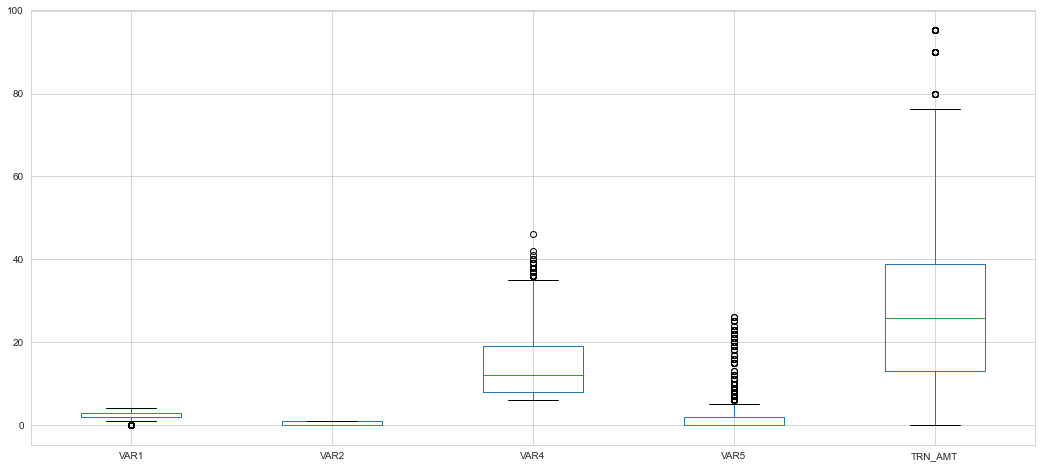

In [12]:
# Plotting the box plots of each feature

col = ['VAR1', 'VAR2', 'VAR4', 'VAR5', 'TRN_AMT']
df.boxplot(column=col, figsize = (18,8))

LEGIT    92588
FRAUD     2094
Name: TRN_TYPE, dtype: int64


<AxesSubplot:xlabel='TRN_TYPE', ylabel='count'>

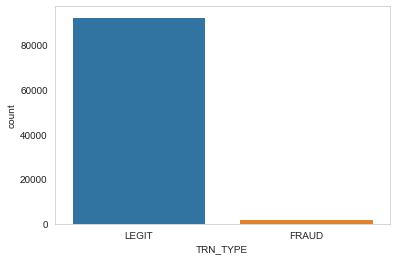

In [13]:
# Plotting the count of each class of the variable 'TRN_TYPE'

print(df['TRN_TYPE'].value_counts())
sns.countplot(x = 'TRN_TYPE', data = df)

In [14]:
# Finding the Shannon Entropy

print(f"The Shannon Entropy is : {scipy.stats.entropy(df['TRN_TYPE'].value_counts())}")

The Shannon Entropy is : 0.10616424951553313


Reasons to check entropy: Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

The closer the entropy is to 0 the more uncertain the dataset is. Perfect value is 1.

In [15]:
# Transforming the categorical attribute 'TRN_TYPE' to a numerical attribute

print(f"The values of the attribute before transforming the data \n{df['TRN_TYPE']}")
df['TRN_TYPE'].replace(('LEGIT', 'FRAUD'), (1, 0), inplace=True)
print()
print(f"The values of the attribute after transforming the data \n{df['TRN_TYPE']}")

The values of the attribute before transforming the data 
0        LEGIT
1        LEGIT
2        LEGIT
3        LEGIT
4        LEGIT
         ...  
94677    LEGIT
94678    LEGIT
94679    LEGIT
94680    LEGIT
94681    LEGIT
Name: TRN_TYPE, Length: 94682, dtype: object

The values of the attribute after transforming the data 
0        1
1        1
2        1
3        1
4        1
        ..
94677    1
94678    1
94679    1
94680    1
94681    1
Name: TRN_TYPE, Length: 94682, dtype: int64


<AxesSubplot:>

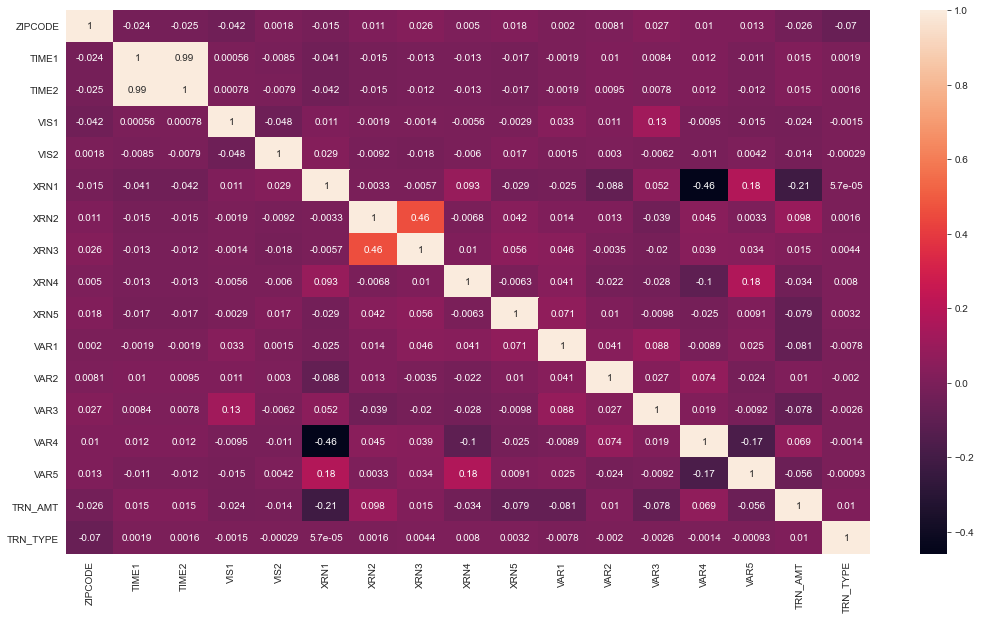

In [16]:
# Displaying the heatmap

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)

### Preprocessing, transforming and analyzing the transformed data

In [17]:
# Transforming the data by peforming oversampling and undersampling

X = df.drop(columns = ['TRN_TYPE'])
y = df['TRN_TYPE']
print(f"Before sampling: {Counter(y)}")

# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Before sampling: Counter({1: 92588, 0: 2094})
Oversampled: Counter({1: 92588, 0: 46294})
Combined Random Sampling: Counter({1: 57867, 0: 46294})


Since the 2 classes are highly imbalanced (as proved with the help of counterplot of the attribute 'TRN_TYPE', and Shannon Entropy) using it to train the model induces bias into the model and so we tend to transform the data to reduce the bias, the two most popular ways of transforming the data to reduce the bias is under-sampling and over-sampling, but both tend to affect the accuracy of the model.

Here we are using a combination of the two to ensure that we reduce the bias as well as do not affect the accuracy too much.

In [18]:
# Displaying the sampled data

df_sampled = X_combined_sampling
df_sampled['TRN_TYPE'] = y_combined_sampling
print(f"The size of the sampled dataset is {df_sampled.shape}")
df_sampled

The size of the sampled dataset is (104161, 19)


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
0,VUHZRNB.COM,JAO,679,19,19,0,0,0,0,0,0,1,3,0,45.376,19,3,12.95,0
1,TMA.COM,MV,369,14,14,0,0,1,1,1,0,1,2,1,40.400,9,0,11.01,0
2,XOSOP.COM,KR,122,19,19,0,0,0,0,0,0,1,4,1,50.648,21,4,0.00,0
3,BRZWCURTY.NET,KR,120,13,13,0,0,1,0,0,0,1,3,1,39.848,8,0,36.26,0
4,TMA.COM,BR,670,21,21,0,0,0,1,1,0,1,0,0,-9.624,24,0,12.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104156,QZHNS.COM,OO,644,14,14,0,0,0,1,1,0,364,4,1,39.192,19,0,0.00,1
104157,XZXDQOGHY.NET,NO,630,6,6,0,0,1,0,0,0,1,2,1,45.360,10,0,12.95,1
104158,XZXDQOGHY.NET,NAO,166,10,10,0,0,1,0,0,0,1,3,0,-14.664,9,0,25.90,1
104159,NUFKP.COM,LO,398,23,23,1,0,0,0,0,0,1,3,1,48.600,22,0,12.95,1


In [19]:
# Displaying the info of the sampled dataset

df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104161 entries, 0 to 104160
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DOMAIN    104161 non-null  object 
 1   STATE     104161 non-null  object 
 2   ZIPCODE   104161 non-null  int64  
 3   TIME1     104161 non-null  int64  
 4   TIME2     104161 non-null  int64  
 5   VIS1      104161 non-null  int64  
 6   VIS2      104161 non-null  int64  
 7   XRN1      104161 non-null  int64  
 8   XRN2      104161 non-null  int64  
 9   XRN3      104161 non-null  int64  
 10  XRN4      104161 non-null  int64  
 11  XRN5      104161 non-null  int64  
 12  VAR1      104161 non-null  int64  
 13  VAR2      104161 non-null  int64  
 14  VAR3      104161 non-null  float64
 15  VAR4      104161 non-null  int64  
 16  VAR5      104161 non-null  int64  
 17  TRN_AMT   104161 non-null  float64
 18  TRN_TYPE  104161 non-null  int64  
dtypes: float64(2), int64(15), object(2)
memory u

In [20]:
# Checking for the number of unique values per feature

df_sampled.nunique()

DOMAIN       7420
STATE          53
ZIPCODE        94
TIME1          24
TIME2          24
VIS1            2
VIS2            2
XRN1            2
XRN2            2
XRN3            2
XRN4            2
XRN5           32
VAR1            5
VAR2            2
VAR3        14344
VAR4           36
VAR5           25
TRN_AMT        82
TRN_TYPE        2
dtype: int64

In [21]:
# Displaying the description of the numerical features of the dataset

df_sampled.describe()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TRN_TYPE
count,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000,104161.000
mean,500.199,13.827,13.847,0.115,0.019,0.546,0.539,0.394,0.016,5.514,2.441,0.429,6.021,14.004,1.383,25.234,0.556
std,221.743,5.179,5.170,0.319,0.135,0.498,0.498,0.489,0.126,88.933,0.988,0.495,31.279,6.437,2.403,14.340,0.497
min,101.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-258.120,6.000,0.000,0.000,0.000
25%,356.000,10.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000,-12.080,9.000,0.000,12.950,0.000
50%,644.000,14.000,14.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,3.000,0.000,11.832,12.000,0.000,20.720,1.000
75%,670.000,18.000,18.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,3.000,1.000,28.880,19.000,2.000,38.850,1.000
max,694.000,23.000,23.000,1.000,1.000,1.000,1.000,1.000,1.000,3278.000,4.000,1.000,65.184,42.000,25.000,95.400,1.000


In [22]:
# Displaying the description of the categorical features of the dataset

df.describe(include = ['object'])

,DOMAIN,STATE
count,94682,94682
unique,9809,53
top,TMA.COM,KR
freq,16451,18676


In [23]:
# Checking the duplicate rate of the sampled data(used to check the percentage of duplicate values present)

duplicate = df_sampled.duplicated().sum()
dup_ratio = round(duplicate/len(df_sampled), 2)
print("Duplication rate: ", dup_ratio)

Duplication rate:  0.45


In [24]:
# Checking the skew of the sampled data

skew = pd.DataFrame(df_sampled).skew()
normality_skew = round(skew.mean(), 4)
print("How far is my dataset from Normal Distribution:", normality_skew)

How far is my dataset from Normal Distribution: 2.5057


Since the normality skew is positive (>0) we can say that the Mean > Median > Mode in the sampled dataset

1    57867
0    46294
Name: TRN_TYPE, dtype: int64


<AxesSubplot:xlabel='TRN_TYPE', ylabel='count'>

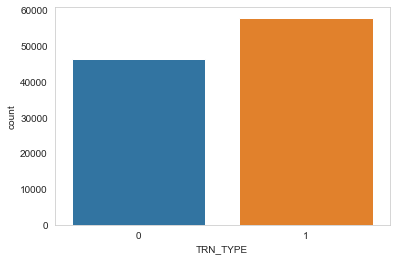

In [25]:
# Displaying the countplot of the column 'TRN_TYPE' of the sampled data

print(df_sampled['TRN_TYPE'].value_counts())
sns.countplot(x = 'TRN_TYPE', data = df_sampled)

<AxesSubplot:>

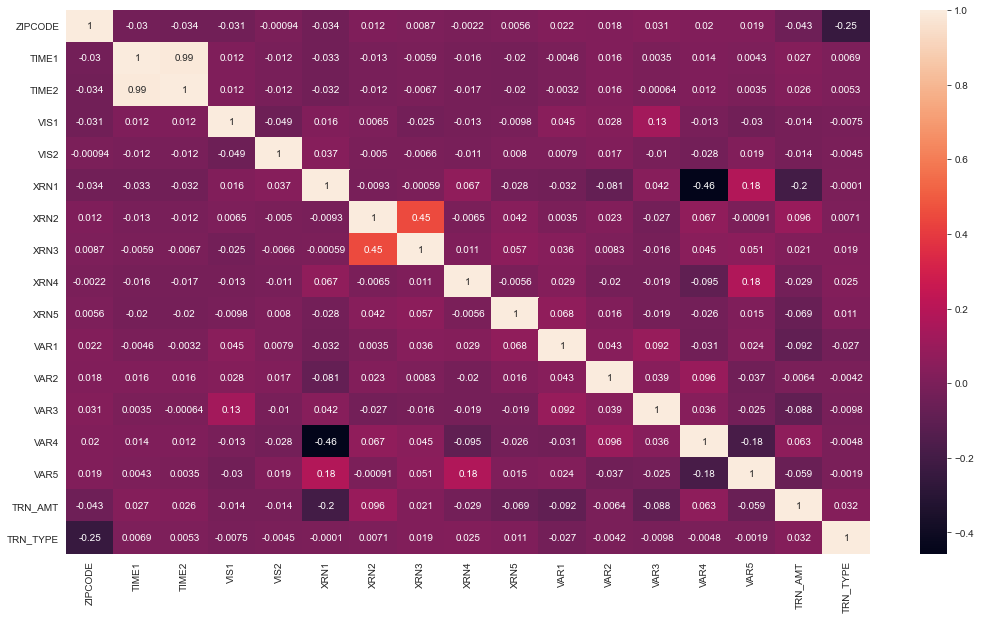

In [26]:
# Displaying the heatmap of the sampled data

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df_sampled.corr(), annot=True)

In [27]:
# Displaying the Shannon Entropy of the sampled data

print(f"The Shannon Entropy is : {scipy.stats.entropy(df_sampled['TRN_TYPE'].value_counts())}")

The Shannon Entropy is : 0.6869620526535805


As you can see transforming the data using a combination of under-sampling and over-sampling did improve the quality of our dataset and this fact is proved by the increased Shannon Entropy score from 0.10 initially to 0.68 after the transformation.

### Visualizing the data

In [28]:
# Displaying the count of each unique value for all the attributes

columns = ['VIS1','VIS2', 'XRN1', 'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5']
for i in columns:
    print(f"For the column {i} the count of each value is \n{df_sampled[i].value_counts()}\n")

For the column VIS1 the count of each value is 
0    92178
1    11983
Name: VIS1, dtype: int64

For the column VIS2 the count of each value is 
0    102234
1      1927
Name: VIS2, dtype: int64

For the column XRN1 the count of each value is 
1    56903
0    47258
Name: XRN1, dtype: int64

For the column XRN2 the count of each value is 
1    56174
0    47987
Name: XRN2, dtype: int64

For the column XRN3 the count of each value is 
0    63156
1    41005
Name: XRN3, dtype: int64

For the column XRN4 the count of each value is 
0    102476
1      1685
Name: XRN4, dtype: int64

For the column XRN5 the count of each value is 
1       79749
2       19304
3        3305
4         869
6         228
5         191
1600       87
200        84
7          68
1643       47
1434       35
364        35
3278       35
8          20
373        18
32         14
977        12
20         12
0          11
162         6
150         5
29          4
983         3
30          3
39          3
77          3
984     

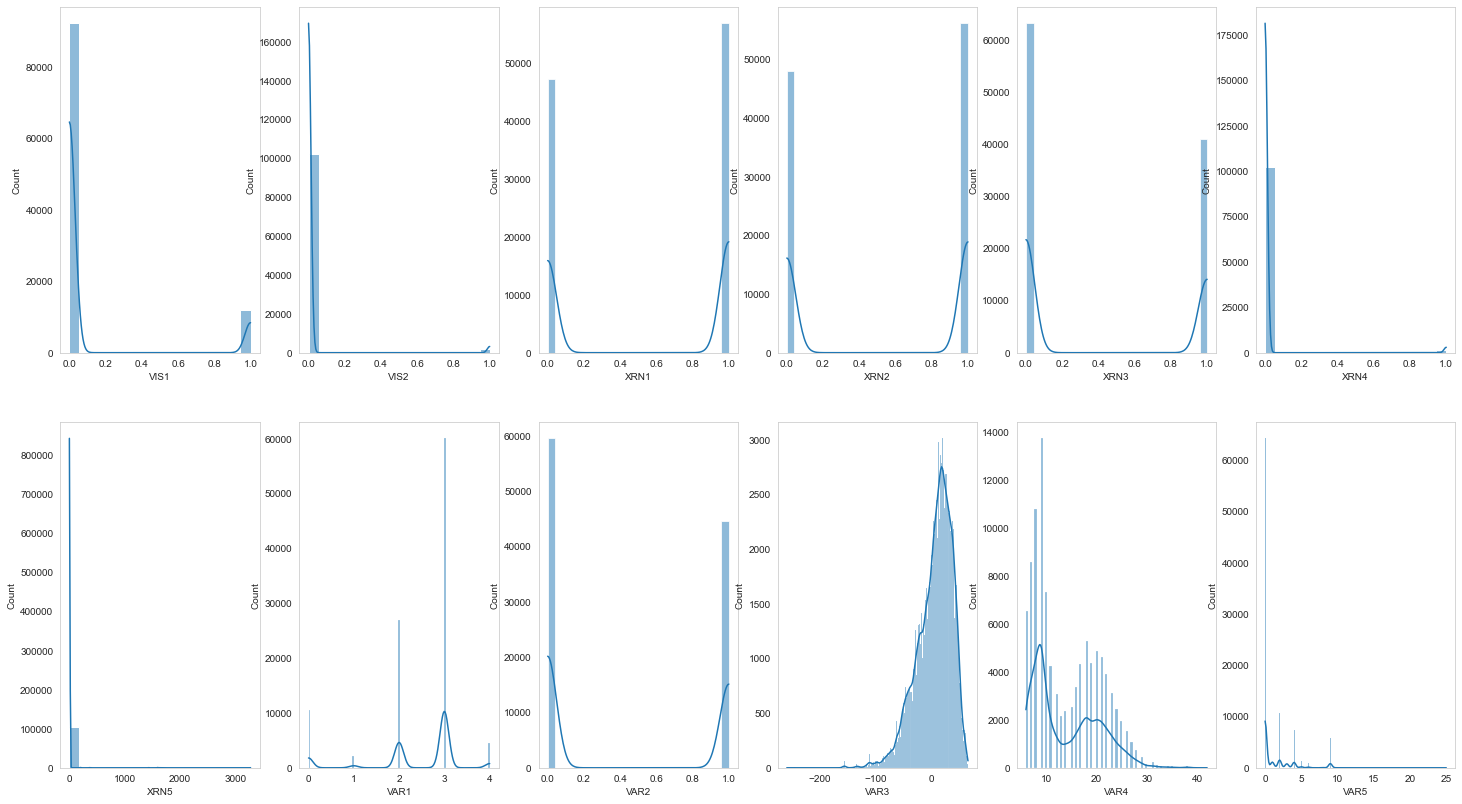

In [29]:
# Plotting the histogram for all the attributes

figure, axis = plt.subplots(2, 6, figsize=(25, 14))
i = 0
for ax in axis[0]:
    sns.histplot(x = columns[i], kde=True, data = df_sampled, ax = ax)
    i+=1
for ax in axis[1]:
    sns.histplot(x = columns[i], kde=True, data = df_sampled, ax = ax)
    i+=1
plt.show()

ZIPCODE     -0.857
TIME1       -0.417
TIME2       -0.410
VIS1         2.413
VIS2         7.147
XRN1        -0.186
XRN2        -0.158
XRN3         0.435
XRN4         7.670
XRN5        26.049
VAR1        -1.327
VAR2         0.288
VAR3        -0.954
VAR4         0.586
VAR5         2.164
TRN_AMT      0.375
TRN_TYPE    -0.224
dtype: float64

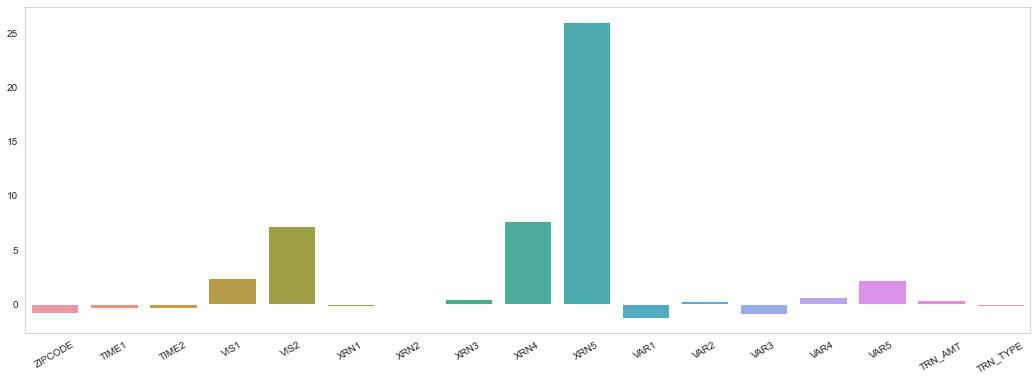

In [30]:
# Plotting the skew plot for all the attributes

plt.subplots(figsize=(18, 6))
columns = df_sampled.columns[2:]
sns.barplot(x=columns, y=df_sampled.skew())
plt.xticks(rotation = 30)
df_sampled.skew()

ZIPCODE      -0.956
TIME1        -0.017
TIME2        -0.022
VIS1          3.823
VIS2         49.075
XRN1         -1.965
XRN2         -1.975
XRN3         -1.811
XRN4         56.836
XRN5        776.448
VAR1          1.164
VAR2         -1.917
VAR3          1.311
VAR4         -0.700
VAR5          4.871
TRN_AMT      -0.930
TRN_TYPE     -1.950
dtype: float64

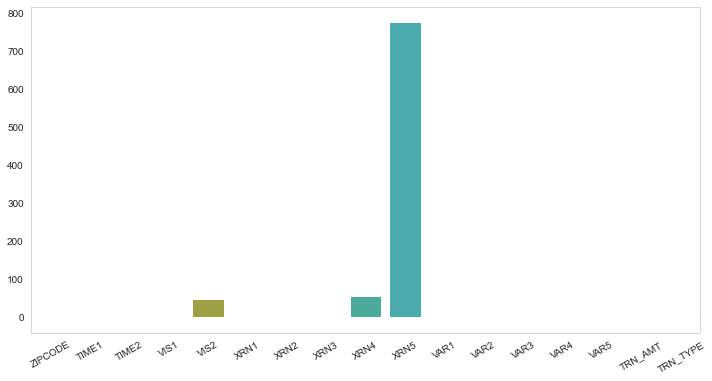

In [31]:
# Plotting the kurtosis plot for all the attributes

plt.subplots(figsize=(12, 6))
columns = df_sampled.columns[2:]
sns.barplot(x=columns, y=df_sampled.kurt())
plt.xticks(rotation = 30)
df_sampled.kurt()

Reason to check kurtosis: Kurtosis identifies whether the tails of a given distribution contain extreme values. In other words, kurtosis determines the heaviness of the distribution tails.

Since the attribute 'XRN5' is heavily dominating in both the skew and kurtosis values, we are removing it to see, clearly, the distribution of skew and kurtosis of the other attributes.

ZIPCODE     -0.857
TIME1       -0.417
TIME2       -0.410
VIS1         2.413
VIS2         7.147
XRN1        -0.186
XRN2        -0.158
XRN3         0.435
XRN4         7.670
XRN5        26.049
VAR1        -1.327
VAR2         0.288
VAR3        -0.954
VAR4         0.586
VAR5         2.164
TRN_AMT      0.375
TRN_TYPE    -0.224
dtype: float64

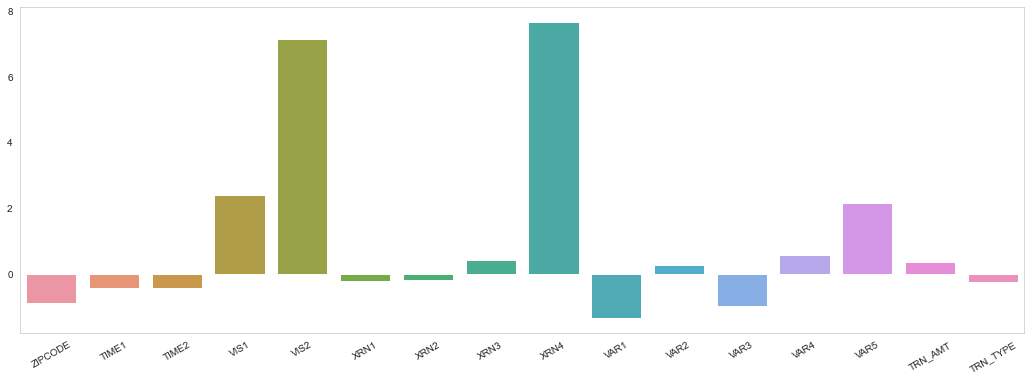

In [32]:
# Plotting the skew of all attributes except 'XRN5'

df_sampled_withoutXRN5 = df_sampled.drop(columns = ['XRN5'])
plt.subplots(figsize=(18, 6))
columns = df_sampled_withoutXRN5.columns[2:]
sns.barplot(x=columns, y=df_sampled_withoutXRN5.skew())
plt.xticks(rotation = 30)
df_sampled.skew()

ZIPCODE     -0.956
TIME1       -0.017
TIME2       -0.022
VIS1         3.823
VIS2        49.075
XRN1        -1.965
XRN2        -1.975
XRN3        -1.811
XRN4        56.836
VAR1         1.164
VAR2        -1.917
VAR3         1.311
VAR4        -0.700
VAR5         4.871
TRN_AMT     -0.930
TRN_TYPE    -1.950
dtype: float64

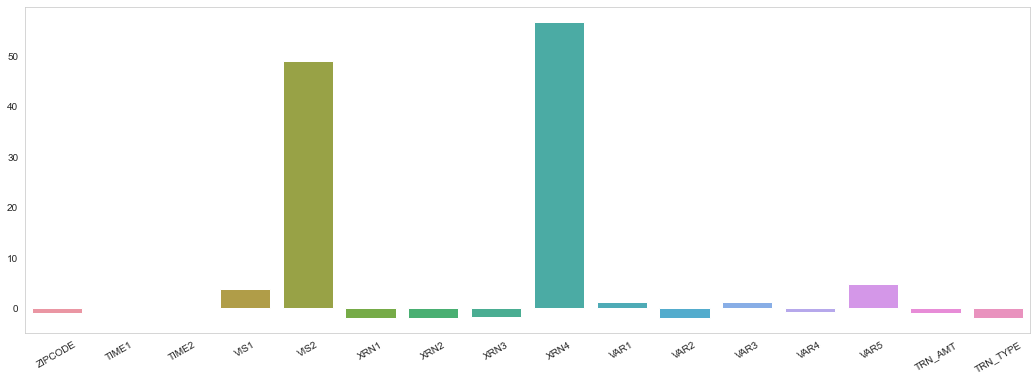

In [33]:
# Plotting the kurtosis of all attributes except 'XRN5'

plt.subplots(figsize=(18, 6))
columns = df_sampled_withoutXRN5.columns[2:]
sns.barplot(x=columns, y=df_sampled_withoutXRN5.kurt())
plt.xticks(rotation = 30)
df_sampled_withoutXRN5.kurt()

### Performing standard scalar to transform the data and randomizing the ordering of the records

In [34]:
# Splitting the depandant and independant attributes into X and y

X, y = df_sampled.drop(columns = ['DOMAIN', 'STATE', 'TRN_TYPE'], axis = 1), df_sampled['TRN_TYPE'] 

In [35]:
# Performing the standard scalar

scaler = StandardScaler()
dfsampled_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
dfsampled_norm

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT
0,0.806,0.999,0.997,-0.361,-0.137,-1.097,-1.082,-0.806,-0.128,-0.051,0.566,-0.866,1.258,0.776,0.673,-0.857
1,-0.592,0.033,0.030,-0.361,-0.137,0.911,0.924,1.241,-0.128,-0.051,-0.446,1.155,1.099,-0.777,-0.576,-0.992
2,-1.706,0.999,0.997,-0.361,-0.137,-1.097,-1.082,-0.806,-0.128,-0.051,1.578,1.155,1.427,1.087,1.089,-1.760
3,-1.715,-0.160,-0.164,-0.361,-0.137,0.911,-1.082,-0.806,-0.128,-0.051,0.566,1.155,1.081,-0.933,-0.576,0.769
4,0.766,1.385,1.384,-0.361,-0.137,-1.097,0.924,1.241,-0.128,-0.051,-2.470,-0.866,-0.500,1.553,-0.576,-0.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104156,0.649,0.033,0.030,-0.361,-0.137,-1.097,0.924,1.241,-0.128,4.031,1.578,1.155,1.061,0.776,-0.576,-1.760
104157,0.585,-1.511,-1.518,-0.361,-0.137,0.911,-1.082,-0.806,-0.128,-0.051,-0.446,1.155,1.258,-0.622,-0.576,-0.857
104158,-1.507,-0.739,-0.744,-0.361,-0.137,0.911,-1.082,-0.806,-0.128,-0.051,0.566,-0.866,-0.661,-0.777,-0.576,0.046
104159,-0.461,1.771,1.771,2.774,-0.137,-1.097,-1.082,-0.806,-0.128,-0.051,0.566,1.155,1.361,1.242,-0.576,-0.857


In [36]:
# Spliting the dataset into test and train in the ratio 80:20 while randomizing and shuffling it

X = dfsampled_norm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)